# Create Wells from SVG Icons

In [135]:
def scale(x,mid,factor):
    x -= mid
    x *= factor
    x += mid
    return x

def get_centre(xs,ys):
    x_mid = int((max(xs) + min(xs))/2)
    y_mid = int((max(ys) + min(ys))/2)
    return (x_mid,y_mid)

# For canvas of 255x255
def fit_to_canvas(xs,ys):
    # Get the centre of the figure
    centre_x,centre_y = get_centre(xs,ys)
    # Centre of 255x255 figure
    screen_centre_x = 128
    screen_centre_y = 128
    # Move the figure to the centre of a 255x255 canvas
    x_offset = screen_centre_x - centre_x
    y_offset = screen_centre_y - centre_y
    xs = [x + x_offset for x in xs]
    ys = [y + y_offset for y in ys]
    
    
    # Scale up if required
    x_dim = max(xs) - min(xs)
    y_dim = max(ys) - min(ys)
    max_dim = max([x_dim,y_dim])
    scale_dim = math.floor((0xE0 / max_dim))
    xs = [int(scale(x,screen_centre_x,scale_dim)) for x in xs]
    ys = [int(scale(y,screen_centre_y,scale_dim)) for y in ys]
    return (xs,ys)


In [384]:
from matplotlib import pyplot as plt
import svgpath
from svgpath import paths_to_points
import numpy as np
import math
import io
from PIL import Image
import os

sample = lambda xs: [xs[i] for i in range(0,len(xs),math.ceil(len(xs)/16))]
plt.style.use('dark_background')

def save_image_buffer(plt):
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    img = Image.open(buf)
    return img

def tempest_bytes_for_image(file_name):
    with open(file_name, "r") as f:
        svg_string = f.read()

    tree = svgpath.parse(svg_string)
    paths = list(svgpath.tree_to_paths(tree))


    _, ax = plt.subplots()
    #ax.invert_yaxis() # origin at top left
    longest = 0
    for path in paths_to_points(paths, resolution=100):
        for trace in path:
            xs = sample(list(trace[:, 0]))
            ys = sample(list(trace[:, 1]))
            if not longest or len(xs) > len(longest[0]):
                longest = (xs,ys)
    longest = fit_to_canvas(*longest)
    ax.plot(*longest,'bo-')
    plt.title(os.path.basename(file_name))
    result = (*longest,os.path.basename(file_name))
    #plt.close()
    return result


Download some icons

In [ ]:
!wget https://github.com/tabler/tabler-icons/releases/download/v3.21.0/tabler-icons-3.21.0.zip

Process them into 16 byte vectors and display them here.

/tmp/ipykernel_3491912/298855852.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  _, ax = plt.subplots()


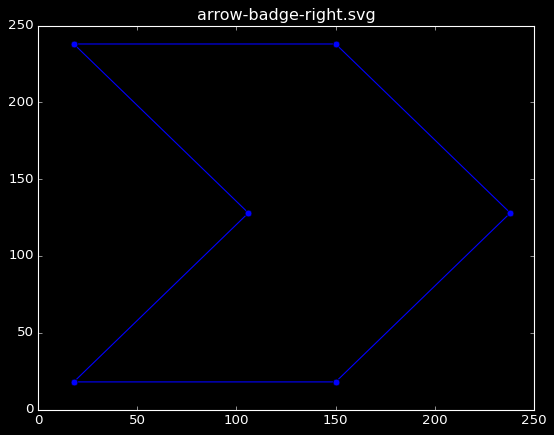

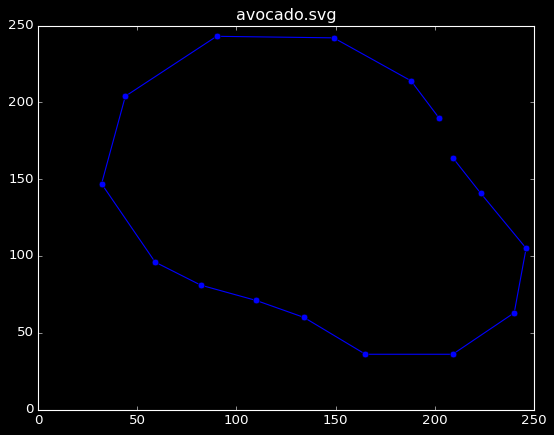

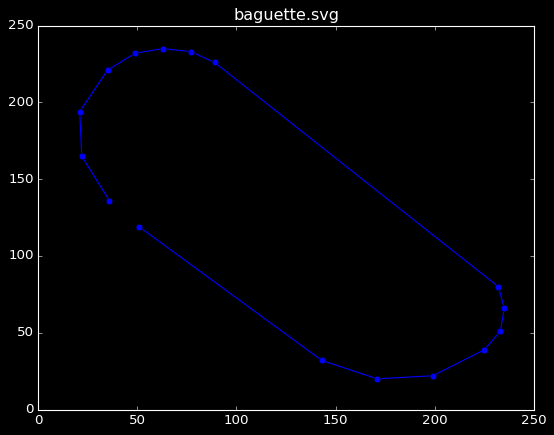

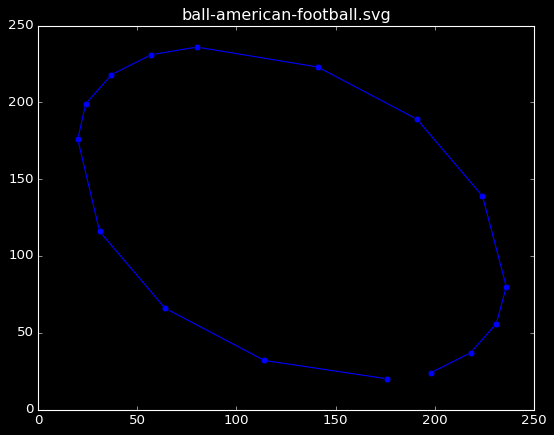

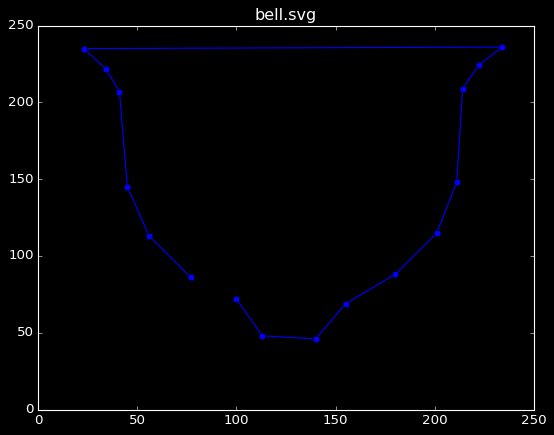

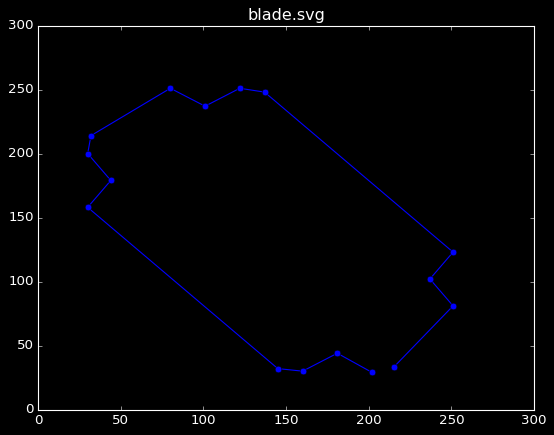

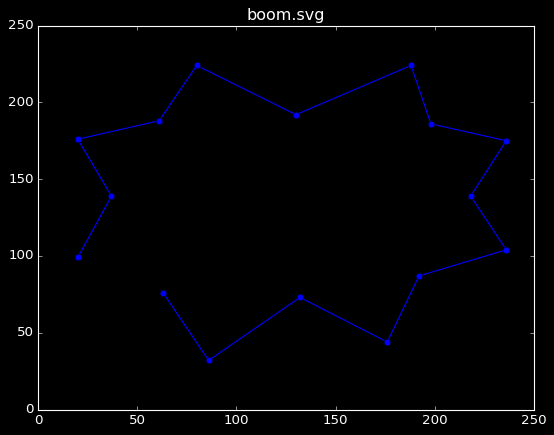

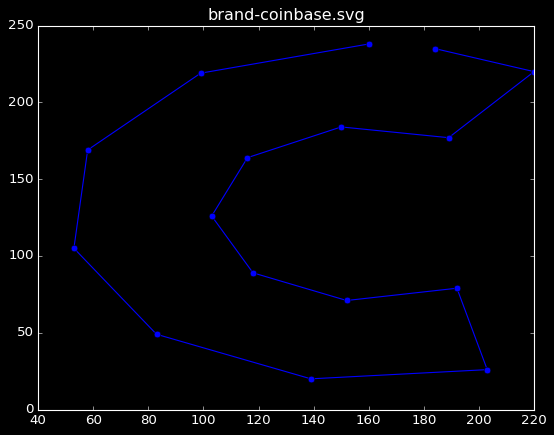

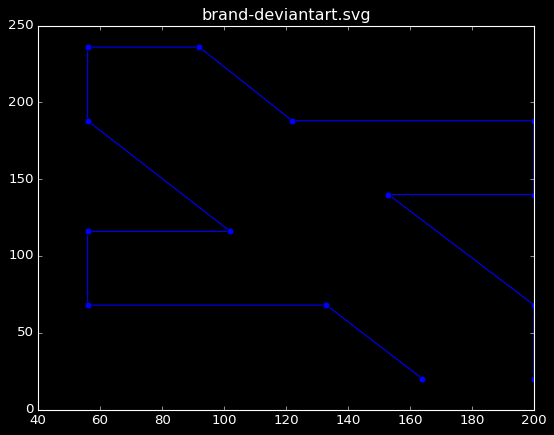

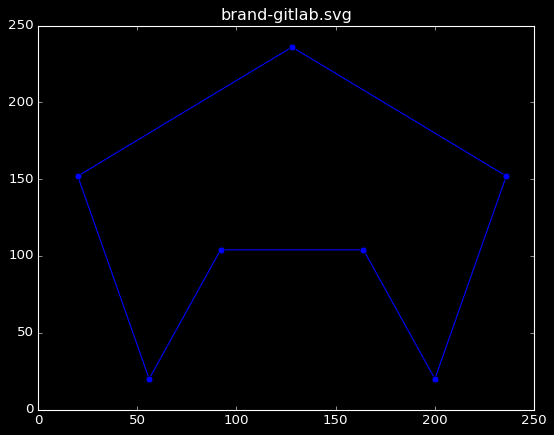

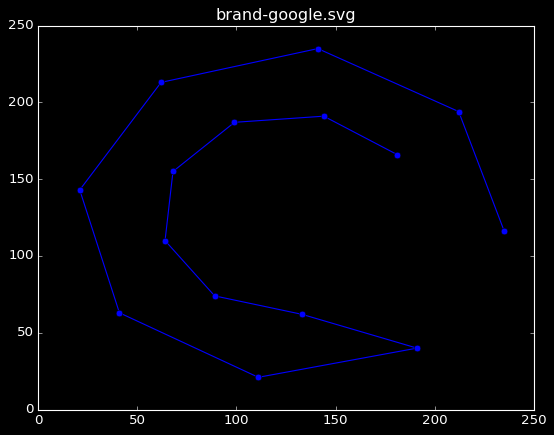

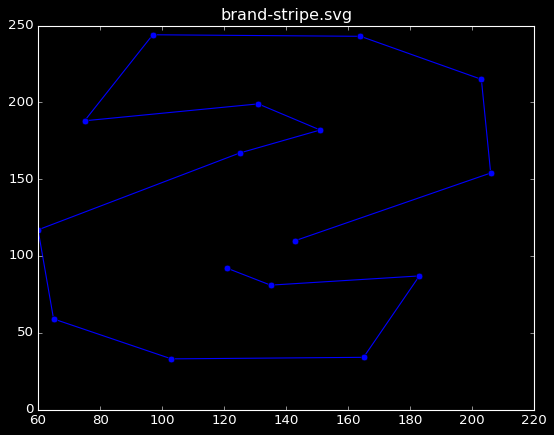

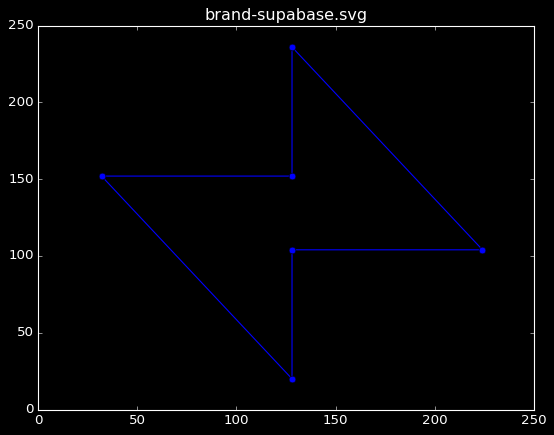

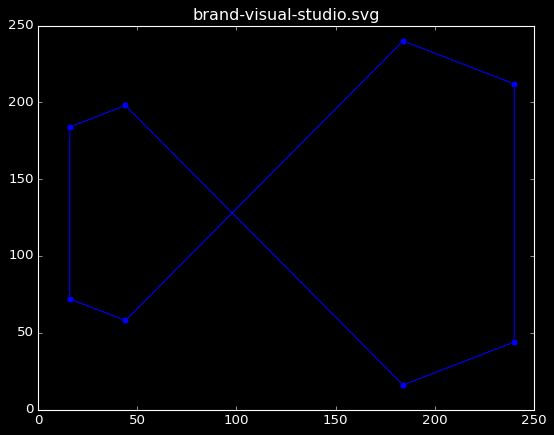

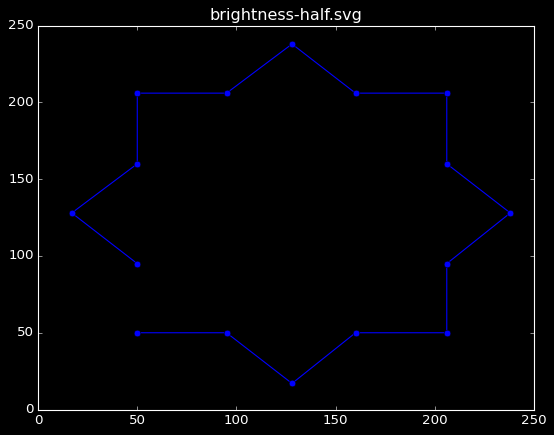

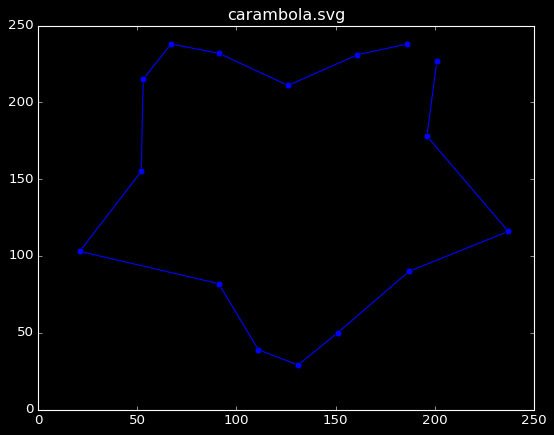

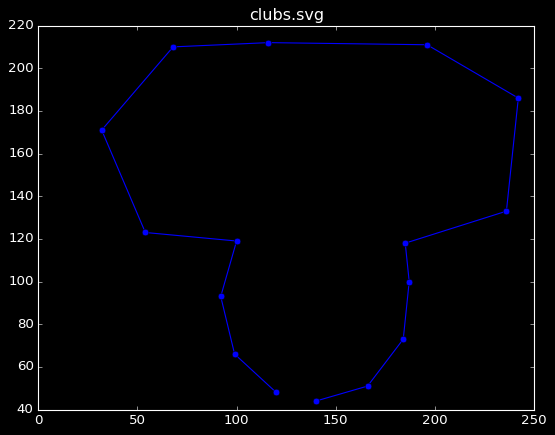

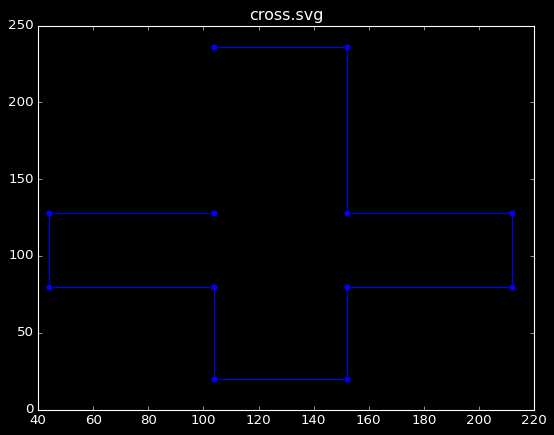

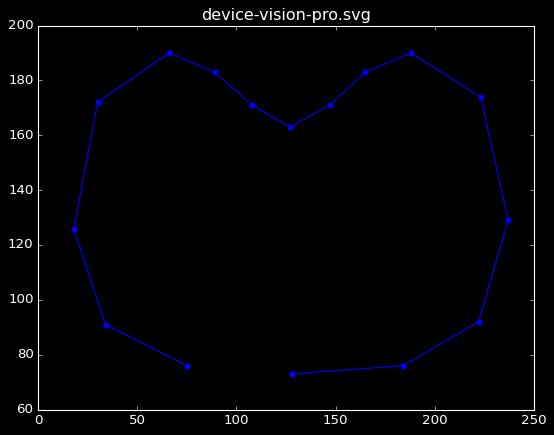

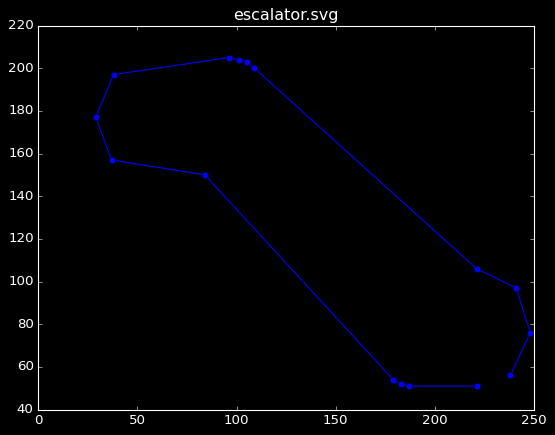

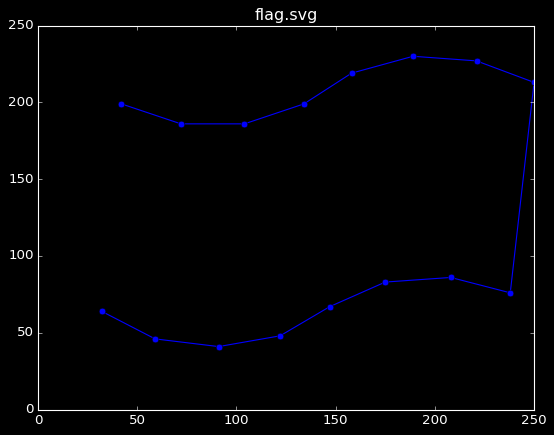

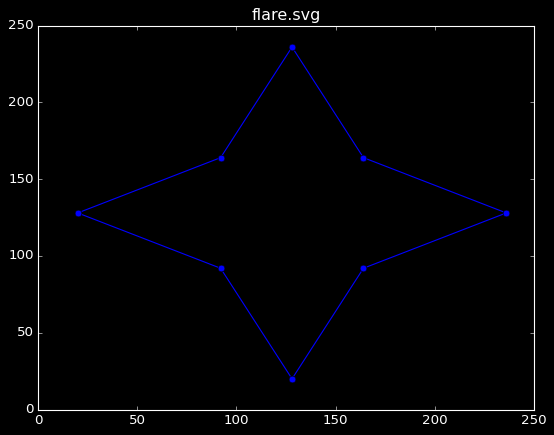

In [401]:
def list_dir(dr):
    for root, dirs, files in os.walk(os.path.abspath(dr)):
        for file in files:
            yield os.path.join(root, file)

vectors = []
for filename in sorted(list_dir("./well_icons/closed_curated/")):
    vectors += [tempest_bytes_for_image(filename)]


Turn the 16 byte vectors into strings we can copy and paste into `ALDIS2.MAC`.

In [390]:
def bytes_string(xs,nm):
    return (".BYTE "+ ','
            .join([f"{x:02x}" if x < 129 else f"{x:03x}" for x in xs])
            + f"; {nm} - {len(xs)} -")

#vectors = [v for v in vectors if len(v[0]) == 16]
print("NEWLIX:")
for i, (xs,ys,nm) in enumerate(vectors):
    if i == 16:
        print()
        print("NEWLI2:")
    print(bytes_string(xs,nm) + f" {i}")

print()
print("NEWLIZ:")
for i, (xs,ys,nm) in enumerate(vectors):
    if i == 16:
        print()
        print("NEWLZ2:")
    print(bytes_string(ys,nm) + f" {i}")



NEWLIX:
.BYTE 096,12,12,6a,6a,12,12,096,096,0ee,0ee,096; arrow-badge-right.svg - 12 - 0
.BYTE 0d1,0df,0f6,0f0,0d1,0a5,086,6e,52,3b,20,2c,5a,095,0bc,0ca; avocado.svg - 16 - 1
.BYTE 0b0,72,40,1f,14,18,25,39,50,08d,0bf,0e0,0ec,0e7,0da,0c6; ball-american-football.svg - 16 - 2
.BYTE 64,71,08c,09b,0b4,0c9,0d3,0d6,0de,0ea,17,22,29,2d,38,4d; bell.svg - 16 - 3
.BYTE 0d7,0fb,0ed,0fb,089,7a,65,50,20,1e,2c,1e,091,0a0,0b5,0ca; blade.svg - 16 - 4
.BYTE 14,25,14,3d,50,082,0bc,0c6,0ec,0da,0ec,0c0,0b0,084,56,3f; boom.svg - 16 - 5
.BYTE 0a0,63,3a,35,53,08b,0cb,0c0,098,76,67,74,096,0bd,0dc,0b8; brand-coinbase.svg - 16 - 6
.BYTE 0c8,0c8,099,0c8,0c8,7a,5c,38,38,66,38,38,085,0a4; brand-deviantart.svg - 14 - 7
.BYTE 0ec,80,80,14,14,38,38,5c,5c,0a4,0a4,0c8,0c8,0ec; brand-gitlab.svg - 14 - 8
.BYTE 0eb,0d4,08d,3e,15,29,6f,0bf,085,59,40,44,63,090,0b5; brand-google.svg - 15 - 9
.BYTE 79,087,0b7,0a5,67,41,3c,7d,097,083,4b,61,0a4,0cb,0ce,08f; brand-stripe.svg - 16 - 10
.BYTE 20,80,80,80,80,0e0,0e0,80,80,80,80,20; b

In [389]:
def points_string(xs,nm):
    return ("s,nm=([" + ','.join([f"{x}".rjust(3) for x in xs])
            + f"], '{nm}') # {len(xs)}")

for i, (xs,ys,nm) in enumerate(vectors):
    print(points_string(xs,nm) + f" {i}")
    print(points_string(ys,nm) + f" {i}")


s,nm=([150, 18, 18,106,106, 18, 18,150,150,238,238,150], 'arrow-badge-right.svg') # 12 0
s,nm=([ 18, 18, 18,128,128,238,238,238,238,128,128, 18], 'arrow-badge-right.svg') # 12 0
s,nm=([209,223,246,240,209,165,134,110, 82, 59, 32, 44, 90,149,188,202], 'avocado.svg') # 16 1
s,nm=([164,141,105, 63, 36, 36, 60, 71, 81, 96,147,204,243,242,214,190], 'avocado.svg') # 16 1
s,nm=([176,114, 64, 31, 20, 24, 37, 57, 80,141,191,224,236,231,218,198], 'ball-american-football.svg') # 16 2
s,nm=([ 20, 32, 66,116,176,199,218,231,236,223,189,139, 80, 56, 37, 24], 'ball-american-football.svg') # 16 2
s,nm=([100,113,140,155,180,201,211,214,222,234, 23, 34, 41, 45, 56, 77], 'bell.svg') # 16 3
s,nm=([ 72, 48, 46, 69, 88,115,148,209,224,236,235,222,207,145,113, 86], 'bell.svg') # 16 3
s,nm=([215,251,237,251,137,122,101, 80, 32, 30, 44, 30,145,160,181,202], 'blade.svg') # 16 4
s,nm=([ 33, 81,102,123,248,251,237,251,214,200,179,158, 32, 30, 44, 29], 'blade.svg') # 16 4
s,nm=([ 20, 37, 20, 61, 80,130,188,198,236

### Fix up

16
.BYTE 68,68,082,098,098,098,0c0,0c0,098,098,082,68,68,40,40,68; cross.svg - 16 - 20
.BYTE 0b2,0ec,0ec,0ec,0b2,80,80,50,50,14,14,14,50,50,80,80; cross.svg - 16 - 20


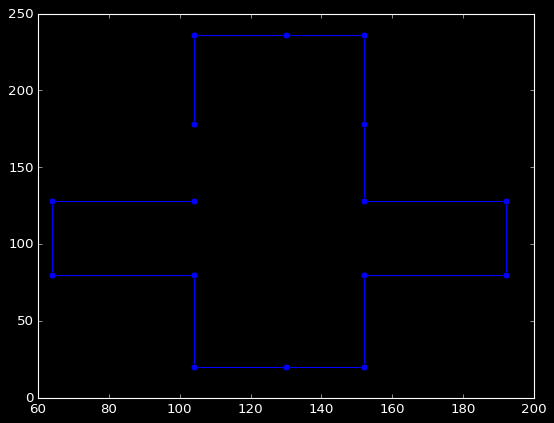

In [400]:
xs,nm=([104,104,130,152,152,152,192,192,152,152,130,104,104, 64, 64,104], 'cross.svg') # 12 16
ys,nm=([178,236,236,236,178,128,128, 80, 80, 20, 20, 20, 80, 80,128,128], 'cross.svg') # 12 16

_, ax = plt.subplots()
ax.plot(xs,ys,'bo-')
print(len(xs))

print(bytes_string(xs,nm) + f" {i}")
print(bytes_string(ys,nm) + f" {i}")
